<a href="https://colab.research.google.com/github/Timur99/derivatives/blob/main/Stochastic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1


  # $$W(t_{i}) = W(t_{i-1}) + z \sqrt{Δ{t}}$$ ,




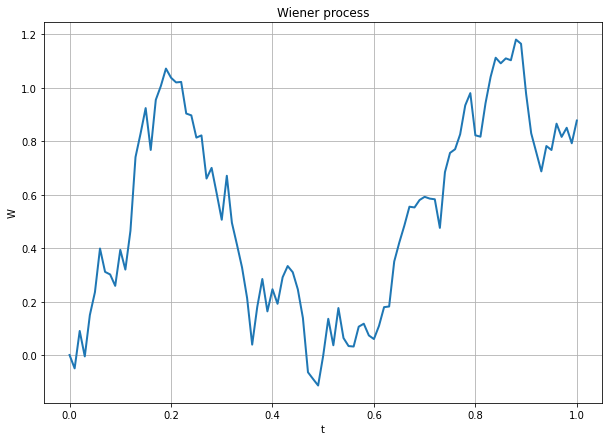

In [17]:

import random
import numpy as np
import math
import matplotlib.pyplot as plt

N = 100
T = 1
X =[i /N for i in range (N+1)]
#сетку

def winir () :
    W =[]
    W +=[0]
    Delta = T / N
    #сетка для N  xs = np.linspace(a, b, 100)
    N_n = np.random.normal (0, 1, len(X))
    for i in range (1,len( X ) ) :
        W +=[ W [i -1]+ N_n[i] * math.sqrt ( Delta ) ]   #  A simulated path of the Wiener process
    return W


W = winir()
plt.figure ( figsize =(10, 7) )
plt.grid ()
plt.plot (X , W , linewidth =2.0)
plt.title ("Wiener process")
plt.xlabel ("t")
plt.ylabel ("W")
plt.show ()


A2

# $$S_{n} = X_{1} + X_{2} + ... + X_{n}$$ ,
# $$P({S_{[nt]} \over \sqrt{n}} < X) -> P(W(t)) < x$$ ,
# $${S_{n} \over \sqrt{n}} -> N(0, 1)$$ 


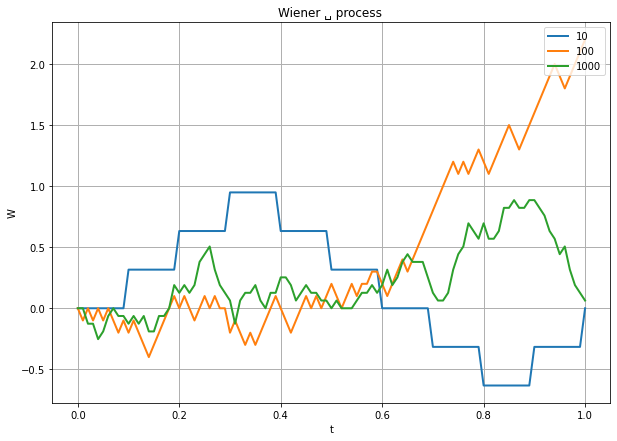

In [22]:
import numpy as np

import matplotlib.pyplot as plt
import math
import random


def runif ( n ) :                                   #генерим случайные величины

    L = np.sign(np.random.normal(0, 1, n))
    return L


def function ( x,n ) :                            #возвращаем значение S по n в момент t
    if x * n >0:
        return S [int ( x * n ) -1]
    else :
        return 0

N =100
T = 1
t = [ i /N for i in range (N +1) ]
nn = [10,100,1000]


fig, ax = plt.subplots()

for j in nn:
    S = np.cumsum(runif(j))                                  #считаем кумулятивная сумма
    W = [function(x,j) / math.sqrt(j) for x in t]            #строим путь процесса Винера как предел случайного блуждания
    ax.plot(t, W, linewidth=2.0)
    ax.grid(linewidth = 1)
    fig.set_figwidth(10)
    fig.set_figheight(7)
    plt.title ('Wiener  process ')
    plt.xlabel ("t")
    plt.ylabel ("W")
    plt.legend([10,100,1000], loc ='upper right')
plt.show()




A3

  # $$ ||f||^{2} = \left(\int_0^T |f(t)|^{2}dt\right)^{1 \over 2}$$ ,
  # $$W(t) = W(t, \omega) = \ Z_{i}(\omega) \phi_{i}(t)$$ ,
  # $$\phi_{i}(t) = {(2 \sqrt{2T}) \over ((2i + 1) \pi)} \sin({(2i + 1) \pi t \over 2T})$$"

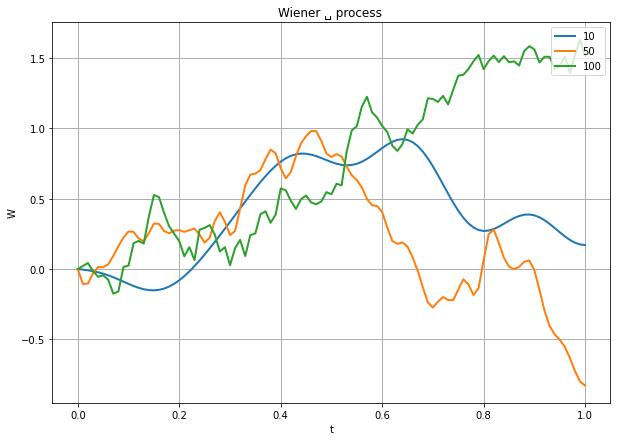

In [27]:
# Приближение Кархунена-Леве к траектории винеровского процесса
import numpy as np

import matplotlib.pyplot as plt
import math
import random
from math import sqrt, sin, pi



def phi (i ,t , T ) :
    return (2* sqrt (2* T ) ) /(( 2* i +1) * pi ) * sin ((( 2* i +1) * pi * t ) /(2* T ) )

def sum_W (t , T, Z ) :
    Sum =0
    for i in range (len( Z ) ) :
        Sum += Z [ i ]* phi (i ,t , T )
    return Sum


T =1
N =100
t = [ i /N for i in range (N+1) ]
nn = [10,50,100]
n = 10


def WWW(n):
    W =[]
    Z = np . random . normal (0, 1, n )
    for i in range ( N +1) :
        W +=[ sum_W ( t [ i ] , T, Z ) ]
    return W

fig, ax = plt.subplots()

for j in nn:
  ax.plot(t, WWW(j), linewidth=2.0)
  ax.grid(linewidth = 1)
  #plt.legend()
  fig.set_figwidth(10)
  fig.set_figheight(7)
  plt.title ('Wiener process ')
  plt.xlabel ("t")
  plt.ylabel ("W")
  plt.legend([10,50,100], loc ='upper right')
plt.show()


A4

   # $$S(t) = x \exp ((r - {\sigma^{2} \over 2})t - \sigma W(t))$$  ,
   # $$S( t + \delta t) = S(t) \exp ((r - {\sigma^{2} \over 2})(t + \delta t -t) + \sigma (W(t + \delta t) - W(t))$$

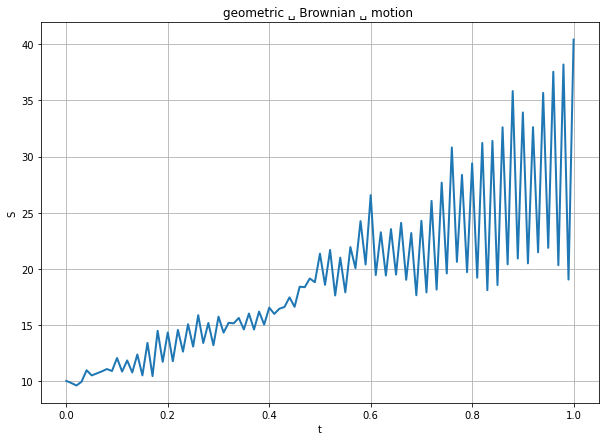

In [23]:
import numpy as np

import matplotlib.pyplot as plt
from math import sqrt, exp
import random


r =1
sigma =0.5
x =10
N =100
T =1
Delta = T / N
W =[0]
t = list ( np . linspace (0,T , N +1) ) #сетка времени

for i in range ( N ) : #винеровский процесс
    W +=[ W [i -1]+ np . random . normal (0, 1, 1) * sqrt ( Delta ) ]

S = []
for i in range (len(W)):
    S.append(x * exp (( r - sigma **2/2) * t [ i ] + sigma * W [ i ])) #for i in range (len( W ) ) ] # геометрическое броуновское движение

plt.figure ( figsize =(10, 7) )
plt.grid ()
plt.plot (t , S , linewidth =2.0)

plt.title ("geometric ␣ Brownian ␣ motion ")
plt.xlabel ("t")
plt.ylabel ("S")
plt.show ()

A5

  # $$W(t_{i}) = W(t_{i-1}) + z \sqrt{Δ{t}}$$ ,
  # $$W_{t_0, x}^{T, y}(t) = x + W(t - t_0) - \frac{t - t_0}{T - t_0}(W(t - t_0) - y + x)$$

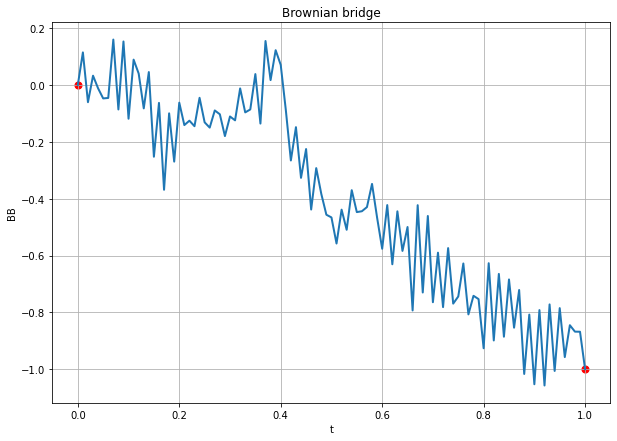

In [29]:
import numpy as np

import matplotlib.pyplot as plt
from math import sqrt, exp
import random



N =100
T =1
Delta = T / N
W = [0]
t = list (np.linspace (0,T , N+1) ) #сетка времени

x = 0
y = -1

for i in range(N):  # генерим винеровский процесс
    W.append(W[i - 1] + np.random.normal(0, 1, 1) * sqrt(Delta))

def BBB(x,y):
    BB = []
    for i in range(N+1):
        BB.append(x + W[i] - t[i] / T * (W[N] - y + x))     #  Brownian bridge
    return BB

plt.figure ( figsize =(10, 7) )
plt.grid ()
plt.plot (t , BBB(x,y) , linewidth =2.0)
plt.scatter ( t [0] , x , color ="red",s =50)
plt.scatter ( t [len( t ) -1] , y , color ="red", s =50)
plt.title ("Brownian bridge")
plt.xlabel ("t")
plt.ylabel ("BB")
plt.show ()

A6